In [2]:
%matplotlib inline
import numpy as np
from scipy.stats import bernoulli, binom, poisson
from scipy.special import factorial
import matplotlib.pyplot as plt

## Statistical Models: Poisson

### Poisson Distribution

The **Poisson** Random Variable $RV$ is based on taking the limit of a Binomial distribution with a fixed mean $np$. As we take $n\rightarrow \infty$, the distribution converges to a fixed discrete PMF which we parameterize by $\mathbf{\lambda=np}$, where $\lambda$ is the average number of event occurring over a particular time interval. Indeed, we can compute the probability of $\mathbf{k}$ successes, substitute $\mathbf{p=\frac{\lambda}{n}}$ as we take the limit of $n$ to $\infty$.

From the Bernoulli Distribution, let's examine how a random variable can possible occur over a time interval:

\begin{align}
P(X=x) &= \left( \array{n\\x}\right) p^x (1-p)^{n-x}\\
\text{where:}&\\
n &: \text{number of trials}\\
x &: \text{number of occurrence}\\
p &: \text{probability of event occurring}\\
\end{align}

**Example** Consider a stock price moves up 3 times on average in a 100 minute interval.
What is the probability it going up 5 times during the next 100 minutes?

\begin{align}
p&=\frac{\lambda}{n}\\
&=\left[\frac{3}{100}\right] = 0.03\\
P(X=5) &= \left(\array{100\\5}\right) 0.03^5 (0.97)^{95}
\end{align}

Now approximating the Poisson Distribution PMF from the Bernoulli distribution:
\begin{align}
P(X=x) \approx \frac{n!}{x!(n-x)!} \cdot \left(\frac{\lambda}{n}\right)^x  \cdot \left(1-\frac{\lambda}{n}\right)^{n-x}
\end{align}

Let the limit of quantity $n$ approach infinity:

\begin{align}
\lim_{n\rightarrow \infty}P(X=x) &\approx \frac{n!}{x!(n-x)!} \cdot \left(\frac{\lambda}{n}\right)^x  \cdot \left(1-\frac{\lambda}{n}\right)^{n-x}\\
&\approx \frac{n!}{x!(n-x)!} \cdot \left(\frac{\lambda^x}{n^x}\right)  \cdot \left(1-\frac{\lambda}{n}\right)^{n-x}\\
&\approx \frac{n!}{x!(n-x)!} \cdot \left(\frac{\lambda^x}{n^x}\right)  \cdot \left(1-\frac{\lambda}{n}\right)^{n} \cdot \left(1-\frac{\lambda}{n}\right)^{-x}\\
\end{align}

Simplify the factorial
\begin{align}
&\approx \frac{1}{x!} \cdot n(n-1)(n-2)\cdots(n-x+1) \cdot \left(\frac{\lambda^x}{n^x}\right)  \cdot \left(1-\frac{\lambda}{n}\right)^{n} \cdot \left(1-\frac{\lambda}{n}\right)^{-x}\\
\end{align}

Rearrange the denominator of the first and third term:
\begin{align}
&\approx \frac{n(n-1)(n-2)\cdots(n-x+1)}{n^x} \cdot \left(\frac{\lambda^x}{x!}\right)  \cdot \left(1-\frac{\lambda}{n}\right)^{n} \cdot \left(1-\frac{\lambda}{n}\right)^{-x}\\
&\approx \left[\frac{n}{n} \frac{(n-1)}{n} \frac{(n-2)}{n} \cdots \frac{(n-x+1)}{n}\right] \cdot \left(\frac{\lambda^x}{x!}\right)  \cdot \left(1-\frac{\lambda}{n}\right)^{n} \cdot \left(1-\frac{\lambda}{n}\right)^{-x}\\
&\approx \left[1 \left(1-\frac{1}{n}\right) \left(1-\frac{2}{n}\right) \cdots \left(1-\frac{x+1}{n}\right)\right] \cdot \left(\frac{\lambda^x}{x!}\right)  \cdot \left(1-\frac{\lambda}{n}\right)^{n} \cdot \left(1-\frac{\lambda}{n}\right)^{-x}\\
\end{align}

With $n\rightarrow \infty$, the fractions in the first term will go to $0$ leaving the first term equal to 1:
\begin{align}
&\approx [1] \cdot \left(\frac{\lambda^x}{x!}\right)  \cdot \left(1-\frac{\lambda}{n}\right)^{n} \cdot \left(1-\frac{\lambda}{n}\right)^{-x}\\
\end{align}

The $\left(1-\frac{\lambda}{n}\right)^{n}$ with $n\rightarrow \infty$ leads to indeterminate form $1^{\infty}$ and evaluates to $e^{-\lambda}$:
\begin{align}
&\approx [1] \cdot \left(\frac{\lambda^x}{x!}\right)  \cdot e^{-\lambda} \cdot \left(1-\frac{\lambda}{n}\right)^{-x}\\
\end{align}

Again, the term $\left(1-\frac{\lambda}{n}\right)^{-x}$ with $n\rightarrow \infty$, $\frac{\lambda}{n}$ will be equal to 0:
\begin{align}
&\approx [1] \cdot \left(\frac{\lambda^x}{x!}\right)  \cdot e^{-\lambda} \cdot (1-0)^{-x}\\
&\approx [1] \cdot \left(\frac{\lambda^x}{x!}\right)  \cdot e^{-\lambda} \cdot [1]\\
&\approx \mathbf{\frac{\lambda^x e^{-\lambda}}{x!}}\\
\end{align}

Therefore, when data follows binomial distribution with **large** $n$ (number of trials) and **small** $p$ (probability of success), $\textit{Poisson}(np)$ is a good approximation to $\textit{Binomial}(n,p)$.

Another interpretation of the Poisson random variable is in terms of a random process called the Poisson process. This is defined as a process where events can occur at any time in continuous time, with an average rate given by the parameter $\lambda$ and satisfying the following conditions:

- Events occur independently of each other.

- The probability that an event occurs in a given length of time is constant.



**Example**  Jumps in price of a particular stock in 1000 days.

In [83]:
n = 1000   # Number of days
p = 0.045  # Probability of jump in price
mu = n*p   # Refer to mean parameter of binomial distribution
print(f"mu: {mu}")

mu: 45.0


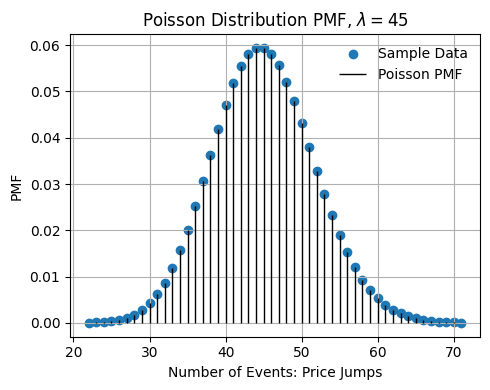

In [85]:
# Plot using derivation shown above
lam = n * p
f = lambda x: np.exp(-lam) * (lam**x) / factorial(x)
# Generate Random sample data
x = np.arange(poisson.ppf(0.0001, mu), poisson.ppf(0.9999, mu))
# or
#x = poisson.rvs(mu=mu, size=n)
y = f(x)
# Plot
fig, ax = plt.subplots(1,1, figsize=(5,4))
ax.scatter(x, y, label="Sample Data")
ax.vlines(x, 0, poisson.pmf(x, mu), colors='k', linestyles='-', lw=1, label='Poisson PMF')
ax.set_title("Poisson Distribution PMF, $\lambda=45$")
ax.set_xlabel("Number of Events: Price Jumps")
ax.set_ylabel("PMF")
plt.tight_layout()
plt.grid(":")
plt.legend(loc="best", frameon=False)
plt.show()

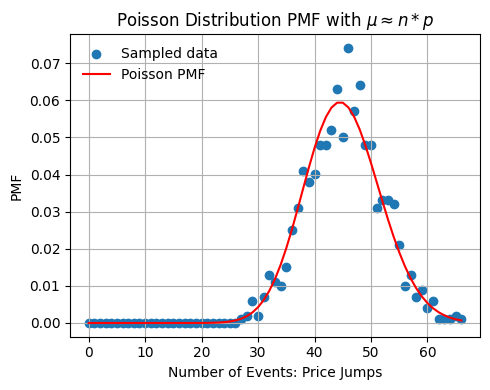

In [86]:
# Plot using scipy poisson and manual histogram plot
# Generate random variables with mean mu and size n
x = poisson.rvs(mu=mu, size=n)
bins = np.arange(np.max(x))
# Plot distribution
density, _ = np.histogram(x, bins, density=True)
# Plot sampled density
fig,ax = plt.subplots(1, 1, figsize=(5,4))
plt.scatter(bins[:-1], density, label="Sampled data")

# Plotting the actual density
ax.plot(bins[:-1], poisson.pmf(bins[:-1], mu), 'red', ms=8, label='Poisson PMF')
ax.set_title(r"Poisson Distribution PMF with $\mu \approx n*p$")
ax.set_xlabel("Number of Events: Price Jumps")
ax.set_ylabel("PMF")
plt.tight_layout()
plt.grid(":")
plt.legend(loc="best", frameon=False)
plt.show()

**Example** Trades an investor will make in a day.
**Example**  Black swan (shock) events in the economy in over a decade.
**Example**  Blocks mined in the Bitcoin network in a month.